# IHaskell+Jupyter+Jupyter-Dashboards Demonstration

Evaluate all the cells in order; wait patientially for all the BitBucket requests to complete; and bask in the joy of the resulting data.

In [1]:
:set -XOverloadedStrings

In [2]:
import qualified Data.ByteString.Char8 as B
import System.Environment (getEnv)
import Control.Dashboard -- provided by the `lib` folder

In [ ]:
-- Bitbucket usernames and passwords. Sad times. This is because
-- OAuth2 doesn't work so well for non-browser-based authentication.
--
-- If someone writes a "OAuth2" thing to authenticate Jupyter
-- notebooks, then life will be a bit better.
--
-- These must be set by the environment that runs this notebook,
-- if you wish to use them. Can be done when running the docker
-- container with
--
-- docker run ... -E "BB_USERNAME=..." ... ihaskell-jdd


-- BitBucket user/pass
username <- B.pack <$> getEnv "BB_USERNAME"
password <- B.pack <$> getEnv "BB_PASSWORD"

-- Alternatively, if you don't want to query private repos,
-- you can just leave "authDeets" set to nothing. If you set
-- a username and password, then
--
--  authDeets = Just (username, password)
--
authDeets = Nothing

In [3]:
-- This `nonzeroPrs` function is from `Control.Dashboard`.
(nonzero, allPrs) <- nonzeroPrs Nothing "hipchat"

Getting PRs for: "qxmpp"
Getting PRs for: "hipchat-kdelibs"
Getting PRs for: "hipqotd"
Getting PRs for: "hipchat-bitbucket"
Getting PRs for: "hipchat-sni-qt"
Getting PRs for: "hipchat-cli"
Getting PRs for: "curler"
Getting PRs for: "hipchat-github-addon"
Getting PRs for: "pusher"
Getting PRs for: "chatty"
Getting PRs for: "hipchat-instagram-addon"
Getting PRs for: "hc-link-renderer"
Getting PRs for: "android-menudrawer"
Getting PRs for: "kidletime"
Getting PRs for: "remoticon-addon"
Getting PRs for: "sonnet"
Getting PRs for: "qwebchannel"
Getting PRs for: "hipchat.bitbucket.org"
Getting PRs for: "x2js"
Getting PRs for: "mms-cli"
Getting PRs for: "repo-locker"
Getting PRs for: "mongodb-marathon"
Getting PRs for: "hipconnecttester"
Getting PRs for: "react-image-uploader"
Getting PRs for: "asset_generator"
Getting PRs for: "hipchat-connect-sample-python"
Getting PRs for: "hipchat-connect-sample-nodejs"
Getting PRs for: "hipchat-connect-training"
Getting PRs for: "hipchat-bookmark-addon"
G

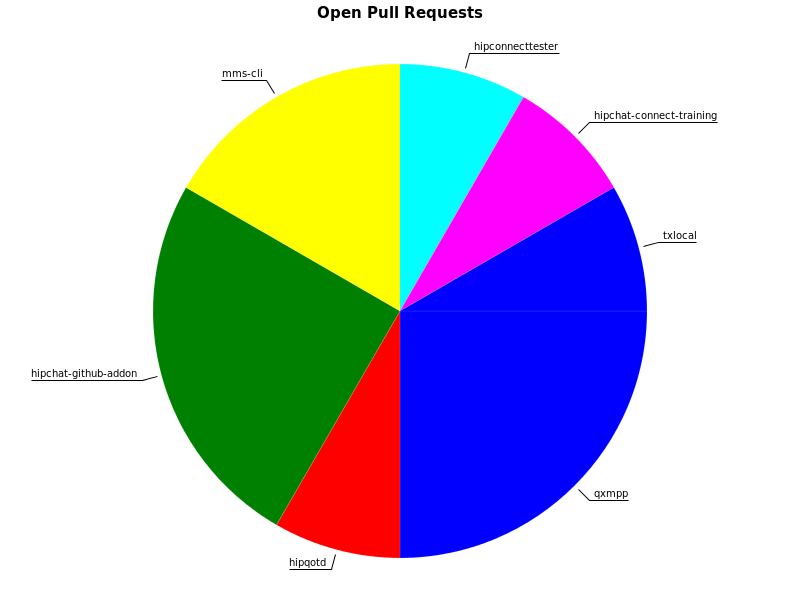

In [4]:
-- This code is necessary because rendering resizable images in IHaskell
-- appears to be broken currently.
--
-- See: https://github.com/gibiansky/IHaskell/issues/81#issuecomment-203093437

-- `mkPrGraph` is defined in the "Control.Dashboard" namespace
makePrGraph "open_prs.png" nonzero
imgData <- B.readFile "open_prs.png"
-- png width height
png 1200 1200 $ base64 imgData

### Total open PRs

In [6]:
let a = sum (map snd nonzero)
print a

12

### Recent PRs

In [7]:
import Data.List (sortBy)
import Data.Ord
import qualified Data.Text    as T
import qualified Data.Text.IO as T

let recent = take 5 $ sortBy (\(_,_,a) (_,_,b) -> compare (Down a) (Down b)) allPrs

mapM_ (\(a,b,c) -> T.putStrLn (T.concat [a, ": ", b, " @ ", T.pack (show c)])) recent

txlocal: Remove transport server extensions @ 2016-03-25 16:40:05 UTC
hipqotd: Build.scala updates for latest postgres version @ 2016-02-11 16:21:25 UTC
hipconnecttester: Some new screens for new functionality @ 2016-02-03 04:18:30 UTC
mms-cli: Fix bug in containerid detection which was breaking docker push @ 2015-12-18 05:31:06 UTC
hipchat-connect-training: instructions.md edited online with Bitbucket @ 2015-11-03 23:55:50 UTC

### \# of Links on List of Lists of Lists

This is a demonstration of writing something in IHaskell; where we
require some external libraries not included with IHaskell itself
(namely, wreq and lens).

In [9]:
import Control.Lens
import Data.Aeson.Lens
import Network.Wreq

-- Get the number of links on this page:
--  https://en.wikipedia.org/wiki/List_of_lists_of_lists
listofListsOfLists :: String
listofListsOfLists = 
    "https://en.wikipedia.org/w/api.php?action=parse&pageid=193763&format=json&prop=links"
    
numLists :: IO Int
numLists = do
    let url  = listofListsOfLists
        opts = defaults

    json <- getWith opts url

    let xs = json ^. responseBody . key "parse" . key "links" . _Array
    
    return $ length xs

In [10]:
num <- numLists
print num

641